In [1]:
import pandas as pd

<h3> 1.1) Import CSV </h3>

In [2]:
df = pd.read_csv('car_sales_table.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   StockID            461 non-null    int64 
 1   Make               461 non-null    object
 2   Model              461 non-null    object
 3   ColorID            461 non-null    int64 
 4   VehicleType        461 non-null    object
 5   CostPrice          461 non-null    int64 
 6   SpareParts         461 non-null    int64 
 7   LaborCost          461 non-null    int64 
 8   Registration_Date  461 non-null    object
 9   Mileage            461 non-null    int64 
 10  PurchaseDate       461 non-null    object
dtypes: int64(6), object(5)
memory usage: 39.7+ KB


In [4]:
df.describe()

,StockID,ColorID,CostPrice,SpareParts,LaborCost,Mileage
count,461.000000,461.00000,461.000000,461.000000,461.000000,461.000000
mean,231.000000,4.40564,44490.444685,1082.060738,676.700651,54744.577007
std,133.223496,2.57629,29263.763125,866.571069,345.627334,23797.189467
min,1.000000,1.00000,4500.000000,50.000000,147.000000,7500.000000
25%,116.000000,2.00000,22500.000000,400.000000,325.000000,52500.000000
50%,231.000000,4.00000,36125.000000,750.000000,570.000000,52500.000000
75%,346.000000,7.00000,67000.000000,1950.000000,987.000000,52500.000000
max,461.000000,9.00000,160000.000000,4000.000000,1250.000000,161000.000000


In [5]:
df.describe(include=object)

,Make,Model,VehicleType,Registration_Date,PurchaseDate
count,461,461,461,461,461
unique,7,27,3,37,1
top,Jaguar,XK,Coupe,9/20/2006,1/1/2012
freq,129,95,240,87,461


<h3> 1.2) Set Stock ID as index </h3>

In [6]:
df.set_index("StockID", inplace=True)
df

,Make,Model,ColorID,VehicleType,CostPrice,SpareParts,LaborCost,Registration_Date,Mileage,PurchaseDate
StockID,,,,,,,,,,
1,Rolls Royce,Camargue,1,Saloon,50000,500,750,1/8/1985,52500,1/1/2012
2,Aston Martin,DBS,2,Coupe,75000,600,550,5/9/2007,75000,1/1/2012
3,Rolls Royce,Silver Ghost,3,Saloon,75000,750,550,9/8/2006,52500,1/1/2012
4,Rolls Royce,Silver Ghost,2,Saloon,88000,85,550,1/5/1987,127220,1/1/2012
5,Rolls Royce,Camargue,5,Saloon,62000,2500,550,1/8/1985,52500,1/1/2012
...,...,...,...,...,...,...,...,...,...,...
457,Aston Martin,DB9,7,Coupe,27500,500,1250,4/5/2007,52000,1/1/2012
458,Aston Martin,DB9,1,Coupe,22500,500,1250,4/5/2003,61000,1/1/2012
459,Rolls Royce,Camargue,2,Saloon,22500,895,950,4/5/2007,52000,1/1/2012


<h3> 1.3) Compare .loc and .iloc </h3>

In [7]:
df.loc[[3, 4, 5]]

,Make,Model,ColorID,VehicleType,CostPrice,SpareParts,LaborCost,Registration_Date,Mileage,PurchaseDate
StockID,,,,,,,,,,
3,Rolls Royce,Silver Ghost,3,Saloon,75000,750,550,9/8/2006,52500,1/1/2012
4,Rolls Royce,Silver Ghost,2,Saloon,88000,85,550,1/5/1987,127220,1/1/2012
5,Rolls Royce,Camargue,5,Saloon,62000,2500,550,1/8/1985,52500,1/1/2012


In [8]:
df.iloc[[3, 4, 5]]

,Make,Model,ColorID,VehicleType,CostPrice,SpareParts,LaborCost,Registration_Date,Mileage,PurchaseDate
StockID,,,,,,,,,,
4,Rolls Royce,Silver Ghost,2,Saloon,88000,85,550,1/5/1987,127220,1/1/2012
5,Rolls Royce,Camargue,5,Saloon,62000,2500,550,1/8/1985,52500,1/1/2012
6,Rolls Royce,Camargue,8,Saloon,125000,4000,550,5/6/1986,28750,1/1/2012


<h3> 1.4) Aggregate functions </h3>

In [9]:
print(f"Highest mileage: {df.Mileage.max()}")
print(f"Sum of costs: {df.CostPrice.sum()}")

Highest mileage: 161000
Sum of costs: 20510095


<h3> 1.5) Manufacturers </h3>

In [10]:
jaguar = df[df.Make == "Jaguar"]
aston_martin = df[df.Make == "Aston Martin"]
bentley = df[df.Make == "Bentley"]
rolls_royce = df[df.Make == "Rolls Royce"]
mgb = df[df.Make == "MGB"]
triumph = df[df.Make == "Triumph"]
tvr = df[df.Make == "TVR"]

In [11]:
def make_info(make):
    print(f"Count of unique models: {len(make.Model.unique())}")
    print(f"Unique Models: ")
    print(str(make.Model.unique()))
    print(f"Total costs: {make.CostPrice.sum()}")
    print(f"Highest cost:  {make.CostPrice.max()}")

In [12]:
print('Jaguar:')
make_info(jaguar)
print('\n')

print('Aston Martin:')
make_info(aston_martin)
print('\n')


print('Bentley:')
make_info(bentley)
print('\n')


print('Rolls Royce:')
make_info(rolls_royce)
print('\n')


print('MGB:')
make_info(mgb)
print('\n')


print('Triumph:')
make_info(triumph)
print('\n')


print('TVR:')
make_info(tvr)
print('\n')


Jaguar:
Count of unique models: 3
Unique Models: 
['XK' 'XJ6' 'XJ12']
Total costs: 4899700
Highest cost:  67000


Aston Martin:
Count of unique models: 8
Unique Models: 
['DBS' 'DB7' 'DB9' 'DB4' 'Vantage' 'Vanquish' 'Rapide' 'Zagato']
Total costs: 6704770
Highest cost:  160000


Bentley:
Count of unique models: 4
Unique Models: 
['Continental' 'Arnage' 'Azure' 'Turbo R']
Total costs: 3179400
Highest cost:  67000


Rolls Royce:
Count of unique models: 6
Unique Models: 
['Camargue' 'Silver Ghost' 'Wraith' 'Silver Shadow' 'Silver Seraph'
 'Phantom']
Total costs: 4116225
Highest cost:  130000


MGB:
Count of unique models: 1
Unique Models: 
['GT']
Total costs: 342000
Highest cost:  13500


Triumph:
Count of unique models: 3
Unique Models: 
['TR4' 'TR5' 'TR7']
Total costs: 655500
Highest cost:  22000


TVR:
Count of unique models: 2
Unique Models: 
['Tuscan' 'Cerbera']
Total costs: 612500
Highest cost:  42500




<h3> 1.6) Profits </h3>

In [13]:
df = df.assign(Profit=df.CostPrice - (df.LaborCost + df.SpareParts))
df

,Make,Model,ColorID,VehicleType,CostPrice,SpareParts,LaborCost,Registration_Date,Mileage,PurchaseDate,Profit
StockID,,,,,,,,,,,
1,Rolls Royce,Camargue,1,Saloon,50000,500,750,1/8/1985,52500,1/1/2012,48750
2,Aston Martin,DBS,2,Coupe,75000,600,550,5/9/2007,75000,1/1/2012,73850
3,Rolls Royce,Silver Ghost,3,Saloon,75000,750,550,9/8/2006,52500,1/1/2012,73700
4,Rolls Royce,Silver Ghost,2,Saloon,88000,85,550,1/5/1987,127220,1/1/2012,87365
5,Rolls Royce,Camargue,5,Saloon,62000,2500,550,1/8/1985,52500,1/1/2012,58950
...,...,...,...,...,...,...,...,...,...,...,...
457,Aston Martin,DB9,7,Coupe,27500,500,1250,4/5/2007,52000,1/1/2012,25750
458,Aston Martin,DB9,1,Coupe,22500,500,1250,4/5/2003,61000,1/1/2012,20750
459,Rolls Royce,Camargue,2,Saloon,22500,895,950,4/5/2007,52000,1/1/2012,20655


<h3> 1.7) Assigning colors in a new dataframe </h3>

In [14]:
color_df = df.copy()

In [15]:
color_list = {
    1: 'Red',
    2: 'Orange',
    3: 'Brown',
    4: 'Yellow',
    5: 'Light Green',
    6: 'Deep Green',
    7: 'Teal',
    8: 'Indigo',
    9: 'Violet'
}

color_df.ColorID.replace(color_list, inplace=True)
color_df = color_df.rename(columns={"ColorID":"Color"})
color_df


,Make,Model,Color,VehicleType,CostPrice,SpareParts,LaborCost,Registration_Date,Mileage,PurchaseDate,Profit
StockID,,,,,,,,,,,
1,Rolls Royce,Camargue,Red,Saloon,50000,500,750,1/8/1985,52500,1/1/2012,48750
2,Aston Martin,DBS,Orange,Coupe,75000,600,550,5/9/2007,75000,1/1/2012,73850
3,Rolls Royce,Silver Ghost,Brown,Saloon,75000,750,550,9/8/2006,52500,1/1/2012,73700
4,Rolls Royce,Silver Ghost,Orange,Saloon,88000,85,550,1/5/1987,127220,1/1/2012,87365
5,Rolls Royce,Camargue,Light Green,Saloon,62000,2500,550,1/8/1985,52500,1/1/2012,58950
...,...,...,...,...,...,...,...,...,...,...,...
457,Aston Martin,DB9,Teal,Coupe,27500,500,1250,4/5/2007,52000,1/1/2012,25750
458,Aston Martin,DB9,Red,Coupe,22500,500,1250,4/5/2003,61000,1/1/2012,20750
459,Rolls Royce,Camargue,Orange,Saloon,22500,895,950,4/5/2007,52000,1/1/2012,20655


In [16]:
colors = color_df["Color"]
df.join(colors)

,Make,Model,ColorID,VehicleType,CostPrice,SpareParts,LaborCost,Registration_Date,Mileage,PurchaseDate,Profit,Color
StockID,,,,,,,,,,,,
1,Rolls Royce,Camargue,1,Saloon,50000,500,750,1/8/1985,52500,1/1/2012,48750,Red
2,Aston Martin,DBS,2,Coupe,75000,600,550,5/9/2007,75000,1/1/2012,73850,Orange
3,Rolls Royce,Silver Ghost,3,Saloon,75000,750,550,9/8/2006,52500,1/1/2012,73700,Brown
4,Rolls Royce,Silver Ghost,2,Saloon,88000,85,550,1/5/1987,127220,1/1/2012,87365,Orange
5,Rolls Royce,Camargue,5,Saloon,62000,2500,550,1/8/1985,52500,1/1/2012,58950,Light Green
...,...,...,...,...,...,...,...,...,...,...,...,...
457,Aston Martin,DB9,7,Coupe,27500,500,1250,4/5/2007,52000,1/1/2012,25750,Teal
458,Aston Martin,DB9,1,Coupe,22500,500,1250,4/5/2003,61000,1/1/2012,20750,Red
459,Rolls Royce,Camargue,2,Saloon,22500,895,950,4/5/2007,52000,1/1/2012,20655,Orange


<h3> 2.1) Manufacturer Plots </h3>

In [17]:
jaguar = df[df.Make == "Jaguar"]
aston_martin = df[df.Make == "Aston Martin"]
bentley = df[df.Make == "Bentley"]
rolls_royce = df[df.Make == "Rolls Royce"]
mgb = df[df.Make == "MGB"]
triumph = df[df.Make == "Triumph"]
tvr = df[df.Make == "TVR"]

In [18]:
import matplotlib.pyplot as plt

In [19]:
makers_list = [jaguar, aston_martin, bentley, rolls_royce, mgb, triumph, tvr]
makers_names = ['Jaguar', 'Aston Martin', 'Bentley', 'Rolls Royce', 'MGB', 'Triumph', 'TVR']
average_profits = [round(makers_list[maker]["Profit"].mean()) for maker in range(len(makers_list))]
total_sales = [round(makers_list[maker]["CostPrice"].sum()) for maker in range(len(makers_list))]
print(total_sales)

[4899700, 6704770, 3179400, 4116225, 342000, 655500, 612500]


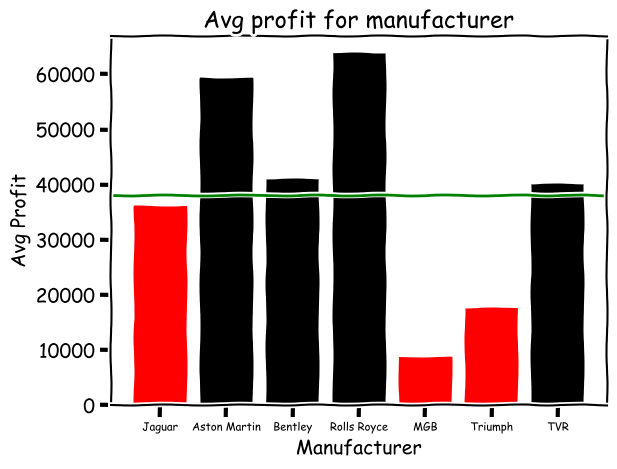

In [33]:
total_average = sum(average_profits) / len(average_profits)
colors = ["red" if avg < total_average else "black" for avg in average_profits]
with plt.xkcd(scale=0.5, randomness=4):
    plt.bar(makers_names, average_profits, color=colors)
    plt.title("Avg profit for manufacturer")
    plt.xlabel("Manufacturer")
    plt.ylabel("Avg Profit")
    plt.xticks(fontsize=8)
    plt.axhline(y=total_average, color='green')
    plt.show()

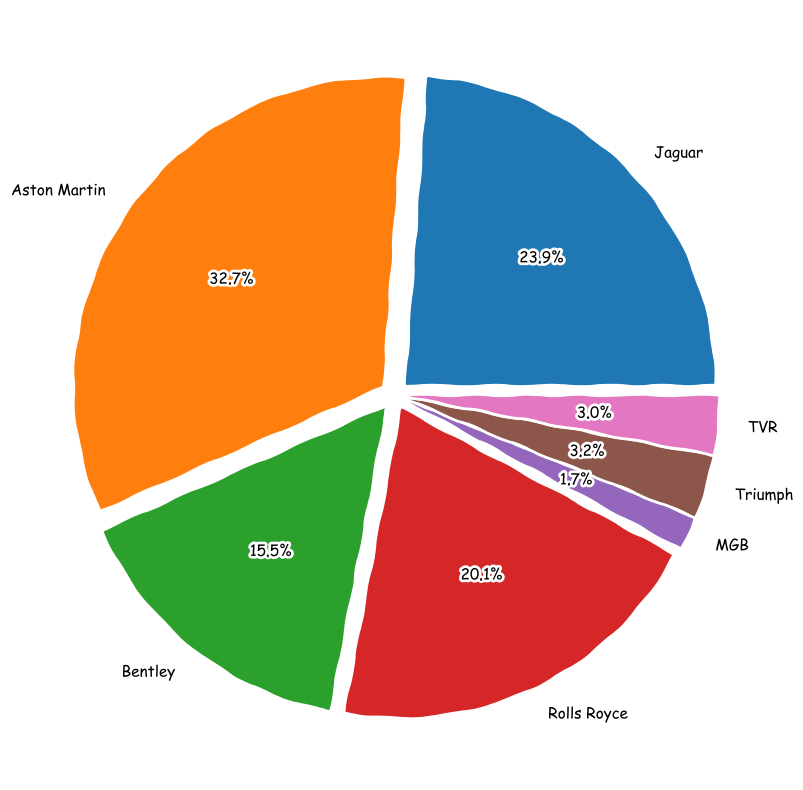

In [34]:
with plt.xkcd(scale=0.7, length=80, randomness=4):
    plt.figure(figsize=(10, 10))
    plt.pie(total_sales, labels=makers_names, autopct='%1.1f%%', textprops={'size': 11}, explode=[.05 for _ in  makers_names])
    plt.show()